In [1]:
import os, sys
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor


In [4]:
dataset = pd.read_csv('./Prediction/Final.csv')


dataset = dataset.fillna(0)

# dataset.to_csv('clean_sequences.csv', index=False)


In [5]:
dataset.shape

(1903, 12)

In [6]:
dataset.describe()

,Age,d180,d180N,L*,SST,Alkane,Alkanol,Sediment,Red,Green,Blue,Grey
count,1903.000000,1903.000000,1.903000e+03,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000,1903.000000
mean,1534.177614,3.807486,1.366267e-11,-0.290495,-0.352962,0.196626,0.308987,0.170414,0.009124,0.007043,0.006127,0.007615
std,1176.593587,0.498841,1.000000e+00,1.001075,1.045943,0.962319,0.986020,1.131473,0.496331,0.491195,0.490241,0.492846
min,0.000000,2.775000,-2.560963e+00,-2.902871,-2.494080,-1.439872,-2.748250,-2.025494,-3.238145,-3.037077,-2.752926,-3.075705
25%,475.500000,3.426000,-7.267121e-01,-1.059356,-1.436499,-0.282659,0.000000,-0.451596,0.000000,0.000000,0.000000,0.000000
50%,1302.000000,3.783000,4.908591e-02,-0.112870,0.000000,-0.031016,0.178058,-0.030568,0.000000,0.000000,0.000000,0.000000
75%,2441.500000,4.170000,7.647445e-01,0.501482,0.534591,0.463392,0.778891,0.320162,0.000000,0.000000,0.000000,0.000000
max,4260.000000,5.085000,2.069769e+00,1.585409,1.440398,5.710774,6.465403,4.233408,1.415121,1.448314,1.586844,1.412118


In [7]:
dataset.tail(-10)

,Age,d180,d180N,L*,SST,Alkane,Alkanol,Sediment,Red,Green,Blue,Grey
10,10,3.523,0.570294,-2.285739,-1.970005,5.334847,3.454411,2.729549,-0.710614,-1.095243,-1.328928,-1.008937
11,11,3.597,0.421950,-2.028815,-1.887668,5.710774,3.664991,2.729549,-0.569124,-0.902878,-1.126968,-0.831966
12,12,3.924,-0.233569,-1.864305,-1.959463,5.489679,3.804791,2.729549,-0.478302,-0.597963,-0.812246,-0.589078
13,13,4.055,-0.496178,-2.455493,-2.020330,5.397252,3.722388,2.729549,-0.738454,-0.780411,-0.905388,-0.784094
14,14,4.281,-0.949228,-2.575363,-1.905597,4.967203,3.435405,2.729549,-1.039355,-1.087011,-1.238789,-1.093504
...,...,...,...,...,...,...,...,...,...,...,...,...
1898,4240,2.975,1.668840,1.513896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1899,4245,3.028,1.562594,1.327339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1900,4250,3.000,1.618724,1.423973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1901,4255,3.129,1.360124,1.069771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


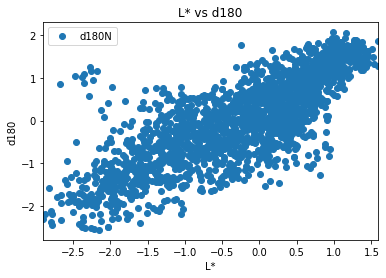

In [8]:
dataset.plot(x='L*', y='d180N', style='o')  
plt.title('L* vs d180')  
plt.xlabel('L*')  
plt.ylabel('d180')  
plt.show()

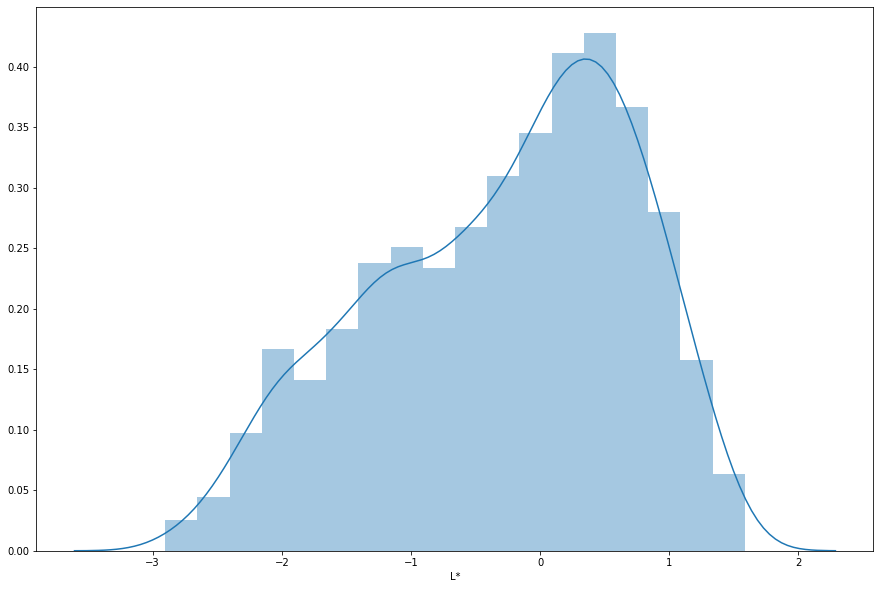

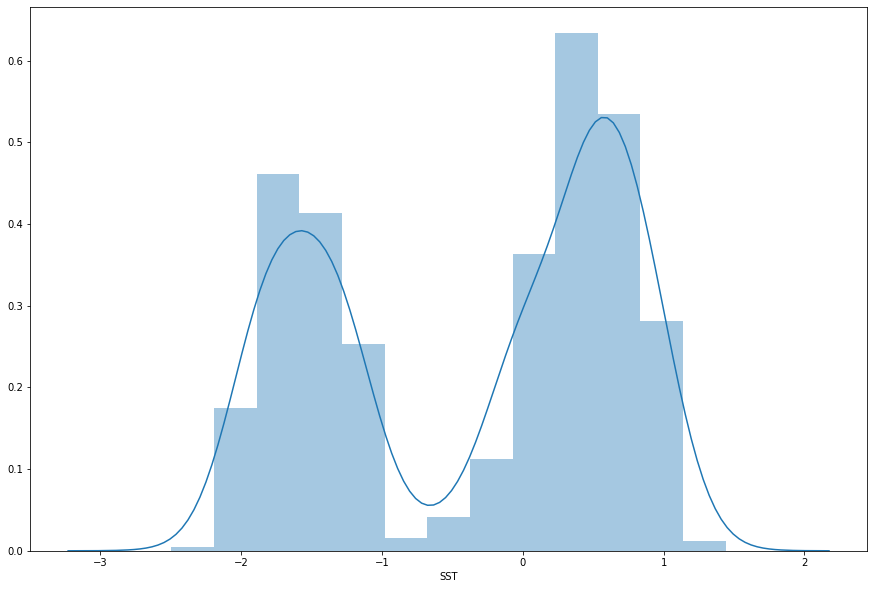

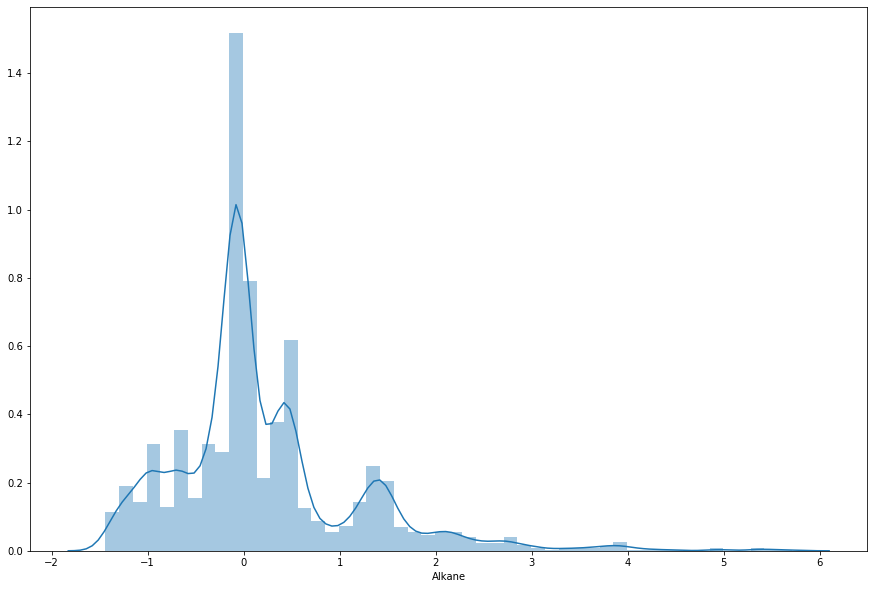

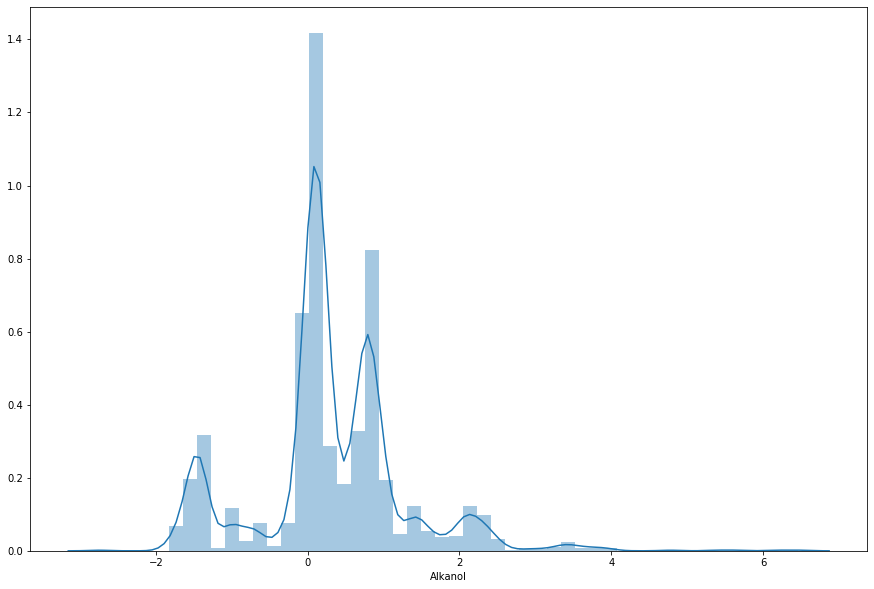

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['L*'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['SST'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Alkane'])

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Alkanol'])


In [10]:
X = dataset['L*'].values.reshape(-1,1)
y = dataset['d180N'].values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.23515422]
[[0.80169132]]


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

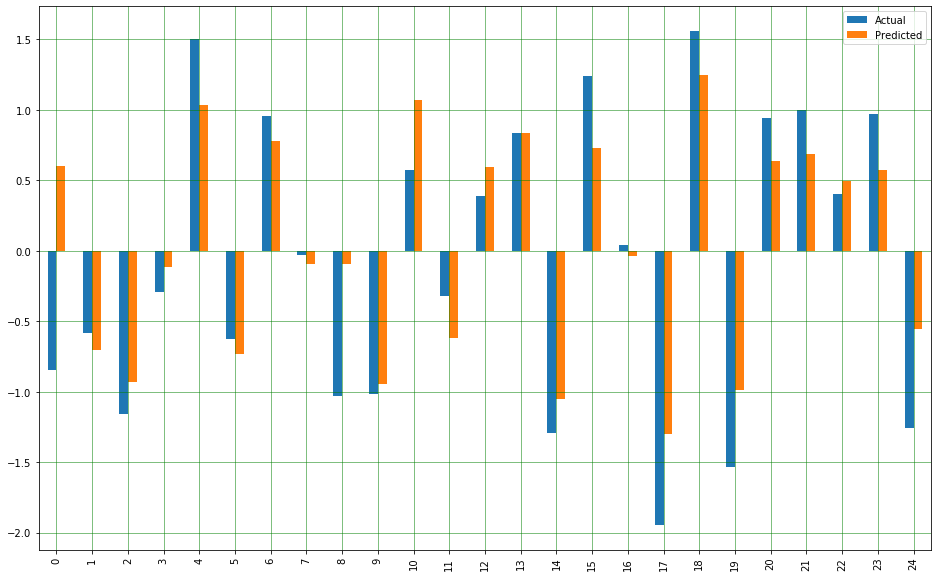

In [16]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

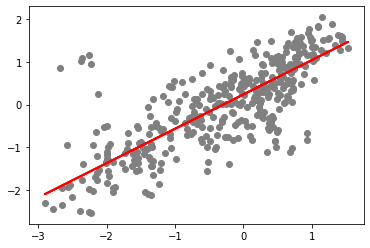

In [17]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.47475722890837146
Mean Squared Error: 0.42316909540976577
Root Mean Squared Error: 0.6505144851652158


Ok, not good.  We will try to CV to see if that improves, but all in all the data set is not big enough to make a difference.



Let's try a SVM; some CV; and then move onto multivariate

In [19]:
dataset.shape

(1903, 12)

In [20]:
X_data1 = dataset.drop(columns = ['d180N'])
y_data1 = dataset.drop(columns = ['Age','d180','L*','SST','Alkane','Alkanol','Sediment','Red','Green','Blue','Grey'])

In [21]:
X_data1_scaled = preprocessing.scale(X_data1)
y_data1 = y_data1.values.reshape(-1,1)
X_data1_scaled.shape

(1903, 11)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_data1_scaled, y_data1, test_size=0.4, random_state=0)

print(X_train.shape, y_train.ravel().shape)
print(X_test.shape, y_test.ravel().shape)

clf = SVR(kernel='rbf', C=0.5).fit(X_train, y_train.ravel())
clf.score(X_test, y_test.ravel())          

(1141, 11) (1141,)
(762, 11) (762,)


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.983243526196583

In [23]:
from sklearn.externals.joblib import parallel_backend

def svc_param_selection(X, y):
    Cs = [0.01, 0.1, 1, 10,20,50]
    gammas = [0.01, 0.5, 1]
    kernel = ['rbf','linear','poly']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernel}
    grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid,n_jobs = 12)
    with parallel_backend('threading'):
    #would need to add back in ,cv = nfolds after param_grid
        grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [24]:
svc_param_selection(X_train,y_train.ravel())

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_data1_scaled, y_data1, test_size=0.4, random_state=0)
X_train.shape, y_train.ravel().shape
X_test.shape, y_test.ravel().shape
clf1 = SVR(kernel='linear', C=1,gamma = 0.01).fit(X_train, y_train.ravel())
clf1.score(X_test, y_test.ravel())                    


0.9982319411458473

pretty good, but let's continue with other models

In [25]:
from sklearn.model_selection import cross_val_score

clf2 = SVR(kernel='rbf', C=20,gamma = 0.01)
scores = cross_val_score(clf2,X_data1_scaled,y_data1.ravel(), cv = 30)
scores



array([0.92983569, 0.99849477, 0.98074526, 0.99444586, 0.98694755,
       0.99611607, 0.9052963 , 0.99580147, 0.99314651, 0.99287497,
       0.99641504, 0.99738716, 0.99226947, 0.98539413, 0.99160359,
       0.99105184, 0.99314058, 0.99036827, 0.98451837, 0.98553583,
       0.99397016, 0.99001091, 0.99574105, 0.9820995 , 0.98869464,
       0.97853204, 0.9686553 , 0.97697225, 0.98208959, 0.93317009])

In [26]:
np.mean(scores)

0.9823774752220931